In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.datasets import load_boston
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")
sns.set()

In [2]:
# create a function for adj-r-sq
def adj_R(r2, x, y):
    r = r2.score(x, y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r)*(n-1)/(n-p-1)
    return adjusted_r2

In [3]:
bstn = load_boston()
features = pd.DataFrame(bstn.data, columns=bstn.feature_names)
features.head(7)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43


In [4]:
features['PRCE'] = bstn.target
features.head(7)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRCE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9


In [5]:
features.shape

(506, 14)

In [6]:
features.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRCE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
features.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRCE       0
dtype: int64

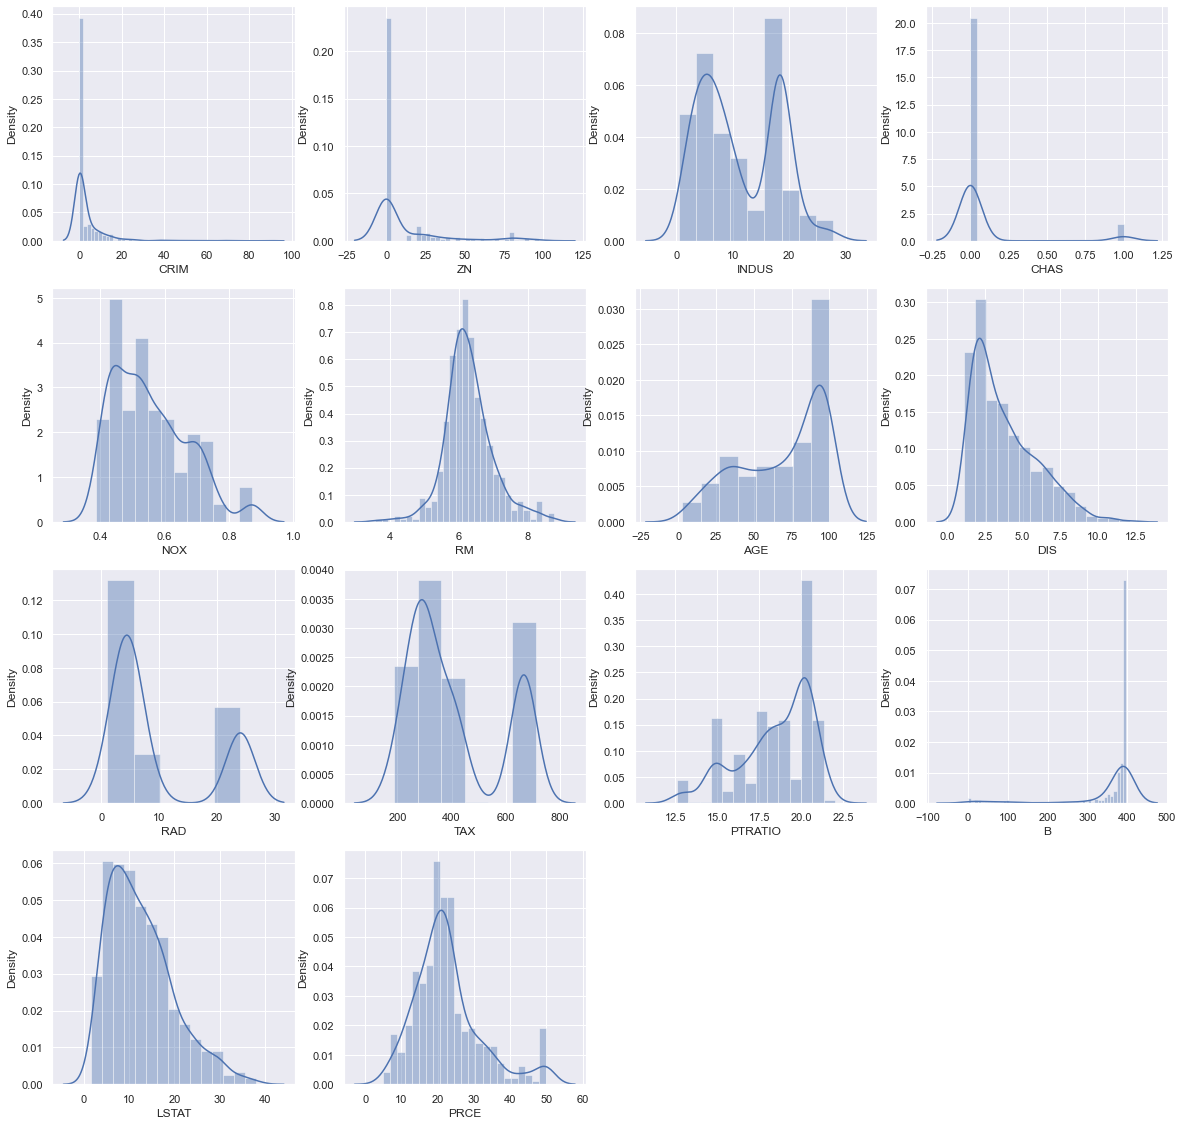

In [115]:
# let's see how data is distributed
plt.figure(figsize=(20,25))
pltnum = 1
for column in features:
    if pltnum <= 20:
        ax = plt.subplot(5,4,pltnum)
        sns.distplot(features[column])
    pltnum += 1
plt.show()

<AxesSubplot:>

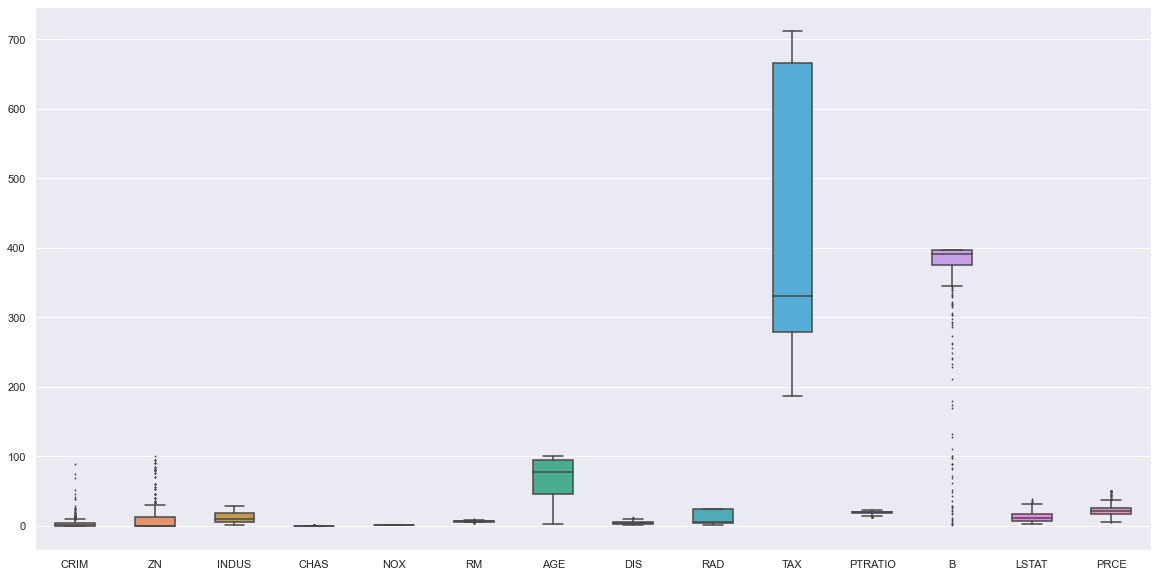

In [9]:
# check for outliers
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(data=features, width=0.5, ax=ax, fliersize=1)

## Handling Outliers

In [10]:
Q1 = features.quantile(0.25)
Q3 = features.quantile(0.75)
IQR = Q3 - Q1

In [11]:
df_out = features[~((features < (Q1 - 1.5 * IQR)) | (features > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out.shape

(268, 14)

In [12]:
df_out

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRCE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


<AxesSubplot:>

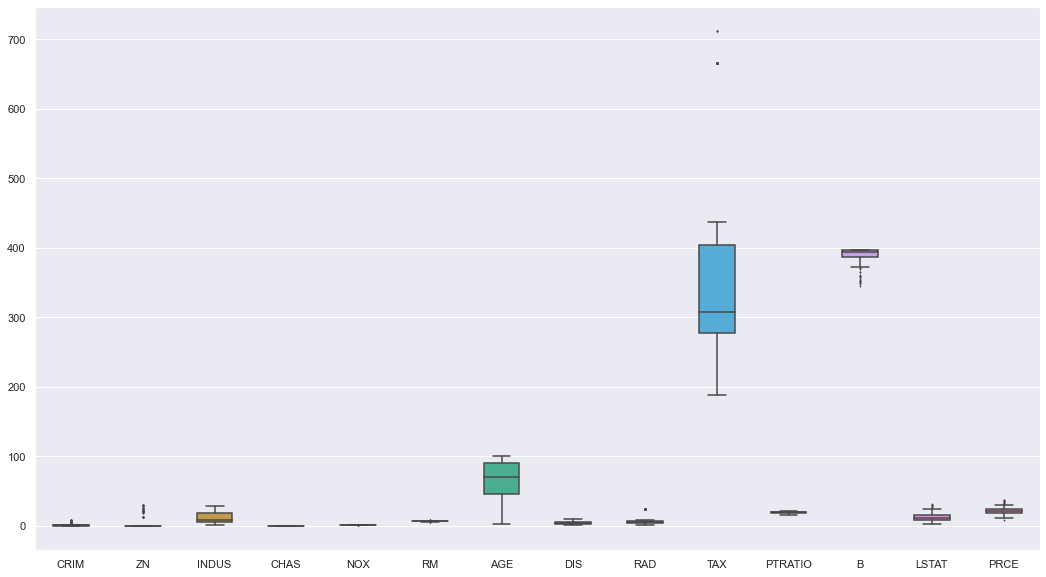

In [13]:
# check for outliers
fig, ax = plt.subplots(figsize=(18,10))
sns.boxplot(data=df_out, width=0.5, ax=ax, fliersize=1)

## Feature Selection

In [14]:
fs1 = smf.ols("PRCE ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT", data=df_out).fit()
print(f"R-square: {fs1.rsquared}")
print(f"Adj. R-square: {fs1.rsquared_adj}")

R-square: 0.7193778429962282
Adj. R-square: 0.7061720944313448


In [15]:
fs2 = smf.ols("PRCE ~ INDUS + AGE + TAX + PTRATIO + LSTAT", data=df_out).fit()
print(f"R-square: {fs2.rsquared}")
print(f"Adj. R-square: {fs2.rsquared_adj}")

R-square: 0.5398272356381189
Adj. R-square: 0.5310453126541135


In [16]:
fs3 = smf.ols("PRCE ~ CRIM + INDUS + AGE + RAD + TAX + PTRATIO + B + LSTAT", data=df_out).fit()
print(f"R-square: {fs3.rsquared}")
print(f"Adj. R-square: {fs3.rsquared_adj}")

R-square: 0.5778032511951907
Adj. R-square: 0.5647624249772816


In [17]:
fs4 = smf.ols("PRCE ~ CRIM + ZN + INDUS + AGE + RAD + TAX + PTRATIO + B + LSTAT", data=df_out).fit()
print(f"R-square: {fs4.rsquared}")
print(f"Adj. R-square: {fs4.rsquared_adj}")

R-square: 0.5892264185393494
Adj. R-square: 0.5748971075581639


In [68]:
fs5 = smf.ols("PRCE ~ CRIM + INDUS + NOX + RM + AGE + DIS + TAX + PTRATIO + B + LSTAT + RAD", data=df_out).fit()
print(f"R-square: {fs5.rsquared}")
print(f"Adj R-square: {fs5.rsquared_adj}")

R-square: 0.7174022029510624
Adj R-square: 0.7052593288591158


Dropping ZN and CHAS only

## Multi Collinearity

In [76]:
X_ = df_out.drop(columns=['PRCE', 'CHAS', 'ZN'])
y_ = df_out.PRCE

scaler = StandardScaler()
X_scaled_ = scaler.fit_transform(X_)

In [77]:
vif = pd.DataFrame()

variables = X_scaled_
vif['VIF'] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif['Features'] = X_.columns
vif

,VIF,Features
0,6.912376,CRIM
1,2.569750,INDUS
2,3.860347,NOX
3,1.939971,RM
4,2.424327,AGE
5,2.618875,DIS
6,9.246012,RAD
7,5.396452,TAX
8,1.237951,PTRATIO
9,1.081111,B


Droping RAD also as it has high vif value

In [78]:
X = df_out.drop(columns=['PRCE', 'CHAS', 'ZN', 'RAD'])
y = df_out.PRCE

X_scaled = scaler.fit_transform(X)

vif = pd.DataFrame()

variables = X_scaled
vif['VIF'] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif['Features'] = X.columns
vif

,VIF,Features
0,3.181570,CRIM
1,2.533423,INDUS
2,3.847628,NOX
3,1.928366,RM
4,2.410251,AGE
5,2.536859,DIS
6,3.438577,TAX
7,1.225444,PTRATIO
8,1.081013,B
9,2.971561,LSTAT


## Correlation

<AxesSubplot:>

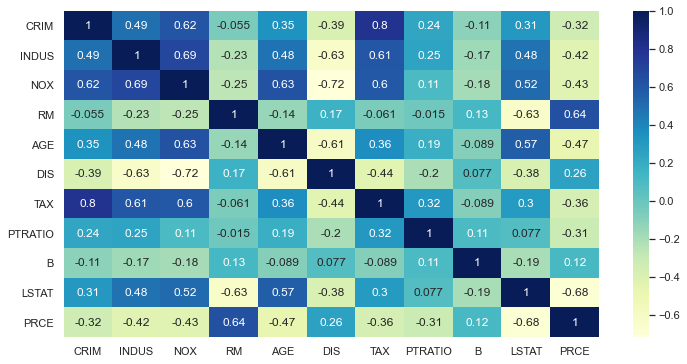

In [118]:
sample = df_out.drop(columns=['ZN', 'CHAS', 'RAD'])
correlation_mat = sample.corr()
plt.figure(figsize=(12,6))
sns.heatmap(data=correlation_mat, annot=True, cmap="YlGnBu")

In [80]:
# train the model
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=42)

In [81]:
rf = RandomForestRegressor(random_state=10)
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=10)

In [82]:
print(f"R-sq {rf.score(x_train, y_train)}")
print(f"Adj R-sq {adj_R(rf, x_train, y_train)}")

R-sq 0.9635013363717166
Adj R-sq 0.9618115834259628


In [119]:
print(f"R-sq {rf.score(x_test, y_test)}")
print(f"Adj R-sq {adj_R(rf, x_test, y_test)}")

R-sq 0.8354331409097138
Adj R-sq 0.7805775212129517


## Hyper Parameter Tuning

In [30]:
grid_param = {
    'criterion': ['mse', 'mae'],
    'max_depth': range(2,20,1),
    'min_samples_leaf': range(1, 10, 1),
    'min_samples_split': range(2, 10 ,1),
    'max_features': ['auto', 'log2'],
    'oob_score':[True, False]
}

In [31]:
grid_search = GridSearchCV(estimator=rf, param_grid=grid_param, cv=5, n_jobs=-1, verbose=3)

In [32]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 10368 candidates, totalling 51840 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=10), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': range(2, 20),
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'oob_score': [True, False]},
             verbose=3)

In [33]:
grid_search.best_params_

{'criterion': 'mse',
 'max_depth': 11,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'oob_score': True}

In [34]:
rf2 = RandomForestRegressor(criterion='mse', max_depth=11, max_features='log2', min_samples_leaf=1, 
                            min_samples_split=2, oob_score=True)
rf2.fit(x_train, y_train)

RandomForestRegressor(max_depth=11, max_features='log2', oob_score=True)

In [84]:
print(f"R-sq {rf2.score(x_train, y_train)}")
print(f"Adj R-sq {adj_R(rf2, x_train, y_train)}")

R-sq 0.9602850671193559
Adj R-sq 0.9584464128193261


In [85]:
print(f"R-sq {rf2.score(x_test, y_test)}")
print(f"Adj R-sq {adj_R(rf2, x_test, y_test)}")

R-sq 0.8520495597251556
Adj R-sq 0.8027327463002075


## Regularization

In [86]:
lassCV = LassoCV(alphas=None, cv=10, max_iter=100000 ,normalize=True)
lassCV.fit(x_train, y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [87]:
alpha = lassCV.alpha_
alpha

0.002586150582921408

In [88]:
lasReg = Lasso(alpha=alpha)
lasReg.fit(x_train, y_train)

Lasso(alpha=0.002586150582921408)

In [89]:
lasReg.score(x_test, y_test)

0.8399083795951541

In [108]:
alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas=alphas, cv=10, normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([2.13808863e+00, 9.00160601e+00, 2.34767836e+00, 2.00960636e+00,
       8.90260620e+00, 7.30480248e+00, 2.19700295e+00, 8.61491460e+00,
       8.39257329e-01, 4.12042204e+00, 9.46111811e+00, 5.42828028e+00,
       8.81713468e+00, 6.22460516e+00, 1.05514112e-01, 2.58559220e+00,
       9.30773020e+00, 9.99807122e+00, 8.98027040e+00, 1.46703949e+00,
       3.00370765e+00, 6.63011546e+0...
       9.91716933e+00, 9.58605005e+00, 2.11965725e+00, 3.71340342e+00,
       9.91559202e+00, 9.15602185e+00, 3.60009913e-01, 5.73924115e-01,
       2.79955983e+00, 7.10060041e+00, 3.45807518e+00, 1.53885260e+00,
       2.73040586e+00, 1.37265009e+00, 4.67726337e+00, 5.39609191e-01,
       8.59609059e+00, 9.99432038e+00, 8.81415427e+00, 5.19354092e+00,
       1.02925842e+00, 4.91437240e+00]),
        cv=10, normalize=True)

In [109]:
ridgecv.score(x_test, y_test)

0.8281584482779949

In [110]:
elasticCV = ElasticNetCV(alphas = None, cv =10)
elasticCV.fit(x_train, y_train)

ElasticNetCV(cv=10)

In [111]:
elasticCV.alpha_

0.06213011916428034

In [112]:
elasticCV.l1_ratio

0.5

In [113]:
elastic = ElasticNet(alpha=elasticCV.alpha_, l1_ratio=0.5)
elastic.fit(x_train, y_train)

ElasticNet(alpha=0.06213011916428034)

In [114]:
elastic.score(x_test, y_test)

0.8336113972551896